# Pressure Scan
K. Sjobak, October 23rd 2018

Scan the pressure in various gasses to see the effect on the beam emittance.

## System setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats


In [2]:
# %matplotlib notebook

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

# #colorCycle = plt.rcParams['axes.prop_cycle']
# plt.rcParams['figure.max_open_warning'] = 100

In [3]:
#Setup MiniScatter
import sys
MiniScatter_path="../build/."
sys.path.append(MiniScatter_path)
#import CLEARview

import miniScatterDriver
import miniScatterScanner

Welcome to JupyROOT 6.28/06


## General scan parameters

In [4]:
#Basic parameters
NUM_THREADS = 16
QUIET = True
TRYLOAD = True #Try to load already existing data instead of recomputing?

baseSimSetup = {}
baseSimSetup["PHYS"] = "QGSP_BERT__SS"
baseSimSetup["BEAM"] = "e-"

baseSimSetup["THICK"] = 15 #Target thickness [mm]

baseSimSetup["ENERGY"] = 215.0 #[MeV]
EPS   = 3.0 #[um]
BETA  = 1.4 #[m]
ALPHA = 0.0
baseSimSetup["COVAR"] = (EPS,BETA,ALPHA)

baseSimSetup["ZOFFSET"] = -baseSimSetup["THICK"]
baseSimSetup["ZOFFSET_BACKTRACK"]=True

baseSimSetup["DIST"] = 1000.0 #[mm]

baseSimSetup["QUICKMODE"] = True #Skip verification plots
#baseSimSetup["N"] = 10000000
#baseSimSetup["N"] = int(1e7)
baseSimSetup["N"] = int(1e5)

baseSimSetup["MINIROOT"]  = True #Skip TTRees in the .root files

#SEED = 1 # starting seed

baseSimSetup["CUTOFF_RADIUS"]=10000.0
baseSimSetup["CUTOFF_ENERGYFRACTION"] = 0.95

#Some derived quantities
gamma_rel = baseSimSetup["ENERGY"]/0.511 #assume electron beam!
beta_rel  = np.sqrt(gamma_rel**2 - 1.0) / gamma_rel;
print(gamma_rel, beta_rel)

#The scan
#press = np.logspace(np.log10(0.5),np.log10(100), 30) #[mbar]
#COMMENT="LOGSPACE"

press = np.linspace(0.5,100,30)
#press = np.linspace(0.5,100,3)

print("press =", press, "[mbar]")

def makeMatStrings(gas):
    matStrings_press = []
    for p in press:
        matStrings_press.append(gas+"::"+str(p))
    return matStrings_press

420.7436399217221 0.9999971755395483
press = [  0.5          3.93103448   7.36206897  10.79310345  14.22413793
  17.65517241  21.0862069   24.51724138  27.94827586  31.37931034
  34.81034483  38.24137931  41.67241379  45.10344828  48.53448276
  51.96551724  55.39655172  58.82758621  62.25862069  65.68965517
  69.12068966  72.55172414  75.98275862  79.4137931   82.84482759
  86.27586207  89.70689655  93.13793103  96.56896552 100.        ] [mbar]


## Data generation / loading

In [5]:
baseSimSetup_Ar = baseSimSetup.copy()

pressScan_Ar = makeMatStrings("Ar")

TRYLOAD_def = TRYLOAD
#TRYLOAD = False

(twiss_Ar, numPart_Ar, objects_Ar, analysis_output_Ar) = \
    miniScatterScanner.ScanMiniScatter("MAT",pressScan_Ar,baseSimSetup_Ar, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=TRYLOAD,\
                                       COMMENT="pressScan_Ar", QUIET=QUIET)
TRYLOAD = TRYLOAD_def

eps_x_Ar = twiss_Ar['tracker_cutoff']['x']['eps']
eps_y_Ar = twiss_Ar['tracker_cutoff']['y']['eps']

#plt.figure()
#plt.semilogx(press,twiss_Ar['tracker_cutoff']['x']['eps'])
#plt.semilogx(press,twiss_Ar['tracker_cutoff']['y']['eps'])
#plt.show()

LoadFile filename and status: 'SaveSim_MAT_pressScan_Ar.h5' True
Loading...
Scan variable ranges match, let's load!
Loaded! That was fast.


In [6]:
baseSimSetup_He = baseSimSetup.copy()

pressScan_He = makeMatStrings("He")

TRYLOAD_def = TRYLOAD
#TRYLOAD = False

(twiss_He, numPHet_He, objects_He, analysis_output_He) = \
    miniScatterScanner.ScanMiniScatter("MAT",pressScan_He,baseSimSetup_He, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=TRYLOAD,\
                                       COMMENT="pressScan_He", QUIET=QUIET)
TRYLOAD = TRYLOAD_def

eps_x_He = twiss_He['tracker_cutoff']['x']['eps']
eps_y_He = twiss_He['tracker_cutoff']['y']['eps']

#plt.figure()
#plt.semilogx(press,twiss_He['tracker_cutoff']['x']['eps'])
#plt.semilogx(press,twiss_He['tracker_cutoff']['y']['eps'])
#plt.show()

LoadFile filename and status: 'SaveSim_MAT_pressScan_He.h5' True
Loading...
Scan variable ranges match, let's load!
Loaded! That was fast.


In [7]:
baseSimSetup_N2 = baseSimSetup.copy()

pressScan_N2 = makeMatStrings("N_2")

TRYLOAD_def = TRYLOAD
#TRYLOAD = False

(twiss_N2, numPN2t_N2, objects_N2, analysis_output_N2) = \
    miniScatterScanner.ScanMiniScatter("MAT",pressScan_N2,baseSimSetup_N2, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=TRYLOAD,\
                                       COMMENT="pressScan_N2", QUIET=QUIET)
TRYLOAD = TRYLOAD_def

eps_x_N2 = twiss_N2['tracker_cutoff']['x']['eps']
eps_y_N2 = twiss_N2['tracker_cutoff']['y']['eps']

#plt.figure()
#plt.semilogx(press,twiss_N2['tracker_cutoff']['x']['eps'])
#plt.semilogx(press,twiss_N2['tracker_cutoff']['y']['eps'])
#plt.show()

LoadFile filename and status: 'SaveSim_MAT_pressScan_N2.h5' True
Loading...
Scan variable ranges match, let's load!
Loaded! That was fast.


In [8]:
baseSimSetup_Ne = baseSimSetup.copy()

pressScan_Ne = makeMatStrings("Ne")

TRYLOAD_def = TRYLOAD
#TRYLOAD = False

(twiss_Ne, numPNet_Ne, objects_Ne, analysis_output_Ne) = \
    miniScatterScanner.ScanMiniScatter("MAT",pressScan_Ne,baseSimSetup_Ne, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=TRYLOAD,\
                                       COMMENT="pressScan_Ne", QUIET=QUIET)
TRYLOAD = TRYLOAD_def

eps_x_Ne = twiss_Ne['tracker_cutoff']['x']['eps']
eps_y_Ne = twiss_Ne['tracker_cutoff']['y']['eps']

#plt.figure()
#plt.semilogx(press,twiss_Ne['tracker_cutoff']['x']['eps'])
#plt.semilogx(press,twiss_Ne['tracker_cutoff']['y']['eps'])
#plt.show()

LoadFile filename and status: 'SaveSim_MAT_pressScan_Ne.h5' True
Loading...
Scan variable ranges match, let's load!
Loaded! That was fast.


In [9]:
baseSimSetup_H2 = baseSimSetup.copy()

pressScan_H2 = makeMatStrings("H_2")

TRYLOAD_def = TRYLOAD
#TRYLOAD = False

(twiss_H2, numPH2t_H2, objects_H2, analysis_output_H2) = \
    miniScatterScanner.ScanMiniScatter("MAT",pressScan_H2,baseSimSetup_H2, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=TRYLOAD,\
                                       COMMENT="pressScan_H2", QUIET=QUIET)
TRYLOAD = TRYLOAD_def

eps_x_H2 = twiss_H2['tracker_cutoff']['x']['eps']
eps_y_H2 = twiss_H2['tracker_cutoff']['y']['eps']

#plt.figure()
#plt.semilogx(press,twiss_H2['tracker_cutoff']['x']['eps'])
#plt.semilogx(press,twiss_H2['tracker_cutoff']['y']['eps'])
#plt.show()

LoadFile filename and status: 'SaveSim_MAT_pressScan_H2.h5' True
Loading...
Scan variable ranges match, let's load!
Loaded! That was fast.


## Plotting

Ar fit:
 eps[um]=0.17656296251573725*press[mbar] + 4.489440168436073

Ne fit:
 eps[um]=0.0026661749169020524*press[mbar] + 2.9878303445024077

N2 fit:
 eps[um]=0.09051157727478526*press[mbar] + 3.31275205253523

He fit:
 eps[um]=0.0006104665514646803*press[mbar] + 2.993093543086055

H2 fit:
 eps[um]=0.0061695319071749365*press[mbar] + 3.0079149152344096



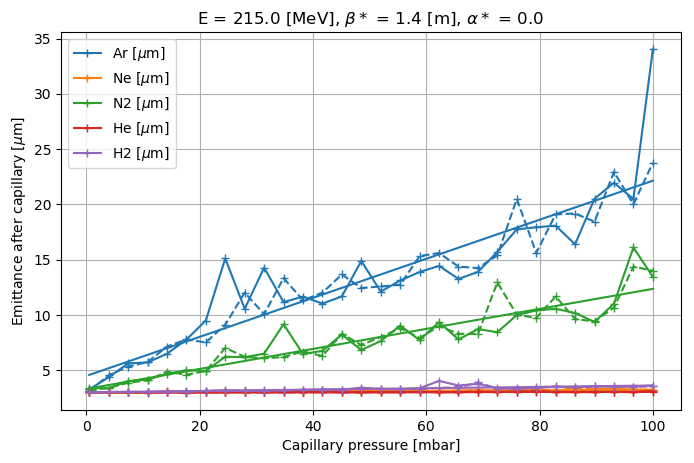

In [10]:
plt.figure()

def doPlot(eps_x, eps_y,name):
    lx = plt.plot(press, eps_x, '+-', label=name + r" [$\mu$m]")[0]
    ly = plt.plot(press, eps_y, '+--', color=lx.get_color())
    
    p  = np.polynomial.Polynomial.fit(np.concatenate([press,press]),np.concatenate([eps_x,eps_y]),1, domain=[])
    plt.plot(press,p(press), color=lx.get_color())
    
    print(f"{name} fit:\n eps[um]={p.coef[1]}*press[mbar] + {p.coef[0]}\n")
    
    #slope, intercept, r_value, p_value, std_err = \
    #    stats.linregress(np.concatenate([press,press]),np.concatenate([eps_x_Ar,eps_y_Ar]))  
    #print("Ar fit:\n eps = {}*press + {}, R={}, P={}, ERR={}\n".format(slope,intercept,r_value,p_value,std_err))

    
doPlot(eps_x_Ar, eps_y_Ar, "Ar")
doPlot(eps_x_Ne, eps_y_Ne, "Ne")
doPlot(eps_x_N2, eps_y_N2, "N2")
doPlot(eps_x_He, eps_y_He, "He")
doPlot(eps_x_H2, eps_y_H2, "H2")

plt.xlabel("Capillary pressure [mbar]")
plt.ylabel("Emittance after capillary [$\mu$m]")
plt.title(r"E = {} [MeV], $\beta*$ = {} [m], $\alpha*$ = {}".format(baseSimSetup["ENERGY"], BETA, ALPHA))

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

#plt.ylim(2.5,5.5)
#plt.xlim(0.4,60)
plt.grid()

plt.legend(loc="upper left")

plt.show()